In [201]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [202]:
import pandas as pd

# Define the tasks
tasks = ['p1', 'p2', 'p3', 'p4']
df_all_master= pd.DataFrame()
# Loop over each task
for task in tasks:
    results_path = f'./{task}/'
    algorithms = sorted(['Random', 'Greedy', 'SARSA', 'QLearn', 'Reinforce', 'ActorCritic', 'Naive', 'WSLS','HMM','Momentum'])
    print('Processing for task', task)

    # Initialize an empty DataFrame to store results for the task
    df_all = pd.DataFrame()
    # Loop over each algorithm
    for algo in algorithms:
        try:
            # Read the CSV file for the algorithm
            df = pd.read_csv(results_path + algo + '.csv')
            #openended or not column
            if task in ['p1','p2']:
                df['Openended'] = 'Focused'
            else:
                df['Openended'] = 'Openended'
            # Add a 'task' column to the DataFrame
            df['Task'] = task

            # Add an 'Algorithm' column to the DataFrame
            df['Algorithm'] = algo
        except FileNotFoundError:
            print('No file for', algo)
            continue

        # Concatenate the current DataFrame with the DataFrame for all algorithms
        df_all = pd.concat([df_all, df])
        dataset= 'Movies'
        filename = f'all_experiments_{dataset}_{task}.csv'
        df_all.to_csv(filename, index=False)
        df_all_master = pd.concat([df_all_master, df_all])

df_all_master.to_csv('all_experiments_Movies.csv', index=False)


# # plot openended subste
# plotter(df_all[df_all['Openended']=='Focused'],'Openended','birdstrikes')
# # plot focused subset
# plotter(df_all[df_all['Openended']=='Focused'],'Focused','birdstrikes')

Processing for task p1
Processing for task p2
Processing for task p3
Processing for task p4


In [203]:
df_all_master[df_all_master['Algorithm']=='HMM']

,Algorithm,User,Threshold,LearningRate,Discount,Temperature,Accuracy,StateAccuracy,Reward,Epsilon,Openended,Task
0,HMM,pro13_ace_p1,0.1,0.0,0.0,NaN,0.538462,NaN,NaN,NaN,Focused,p1
1,HMM,pro13_ace_p1,0.2,0.0,0.0,NaN,0.521739,NaN,NaN,NaN,Focused,p1
2,HMM,pro13_ace_p1,0.3,0.0,0.0,NaN,0.100000,NaN,NaN,NaN,Focused,p1
3,HMM,pro13_ace_p1,0.4,0.0,0.0,NaN,0.111111,NaN,NaN,NaN,Focused,p1
4,HMM,pro13_ace_p1,0.5,0.0,0.0,NaN,1.000000,NaN,NaN,NaN,Focused,p1
...,...,...,...,...,...,...,...,...,...,...,...,...
283,HMM,stu7_ade_p4,0.4,0.0,0.0,NaN,0.239130,NaN,NaN,NaN,Openended,p4
284,HMM,stu7_ade_p4,0.5,0.0,0.0,NaN,0.259740,NaN,NaN,NaN,Openended,p4
285,HMM,stu7_ade_p4,0.6,0.0,0.0,NaN,0.435484,NaN,NaN,NaN,Openended,p4
286,HMM,stu7_ade_p4,0.7,0.0,0.0,NaN,0.404255,NaN,NaN,NaN,Openended,p4


In [204]:
#join 2 results dataframe for 2 dataset
df_all_master_birdstrikes = pd.read_csv("../birdstrikes/all_experiments_BirdStrikes.csv")
df_all_master_movies = pd.read_csv("all_experiments_Movies.csv")

In [189]:
#join these 2 datasets add a new column called dataset and put the name Movies or BirdStrikes
df_all_master_birdstrikes['Dataset'] = 'BirdStrikes'
df_all_master_movies['Dataset'] = 'Movies'
#for column User keep only first four letters

df_all_master_overall = pd.concat([df_all_master_birdstrikes,df_all_master_movies])
df_all_master_overall['User'] = df_all_master_overall['User'].str[:5]
df_all_master_overall.to_csv('all_experiments_overall.csv', index=False)

In [168]:
len(df_all_master_overall['User'].unique())
#remove naive algorithm nad hmm
df_all_master_overall = df_all_master_overall[~df_all_master_overall['Algorithm'].isin(['Naive','HMM'])]
#for each algorithm give the number of users for whom the algo is wth the MaX AVERAGE ACCURACY
df_users=df_all_master_overall.groupby(['User','Algorithm'])['Accuracy'].mean().reset_index().sort_values('Accuracy',ascending=False).groupby('User').head(1)


In [169]:
df_users['Algorithm'].value_counts()

Algorithm
QLearn         42
SARSA          15
ActorCritic     9
Reinforce       6
Name: count, dtype: int64

/var/folders/w6/jn7_623d6d96165_8x9l_vqh0000gn/T/ipykernel_58897/4292166292.py:14: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(x="Threshold", y="Accuracy", hue="Algorithm", data=df_avg, ax=ax,
/var/folders/w6/jn7_623d6d96165_8x9l_vqh0000gn/T/ipykernel_58897/4292166292.py:14: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(x="Threshold", y="Accuracy", hue="Algorithm", data=df_avg, ax=ax,
/var/folders/w6/jn7_623d6d96165_8x9l_vqh0000gn/T/ipykernel_58897/4292166292.py:14: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(x="Threshold", y="Accuracy", hue="Algorithm", data=df_avg, ax=ax,
/var/folders/w6/jn7_623d6d96165_8x9l_vqh0000gn/T/ipykernel_58897/4292166292.py:14: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(x="Threshold", y="Accuracy", hue="

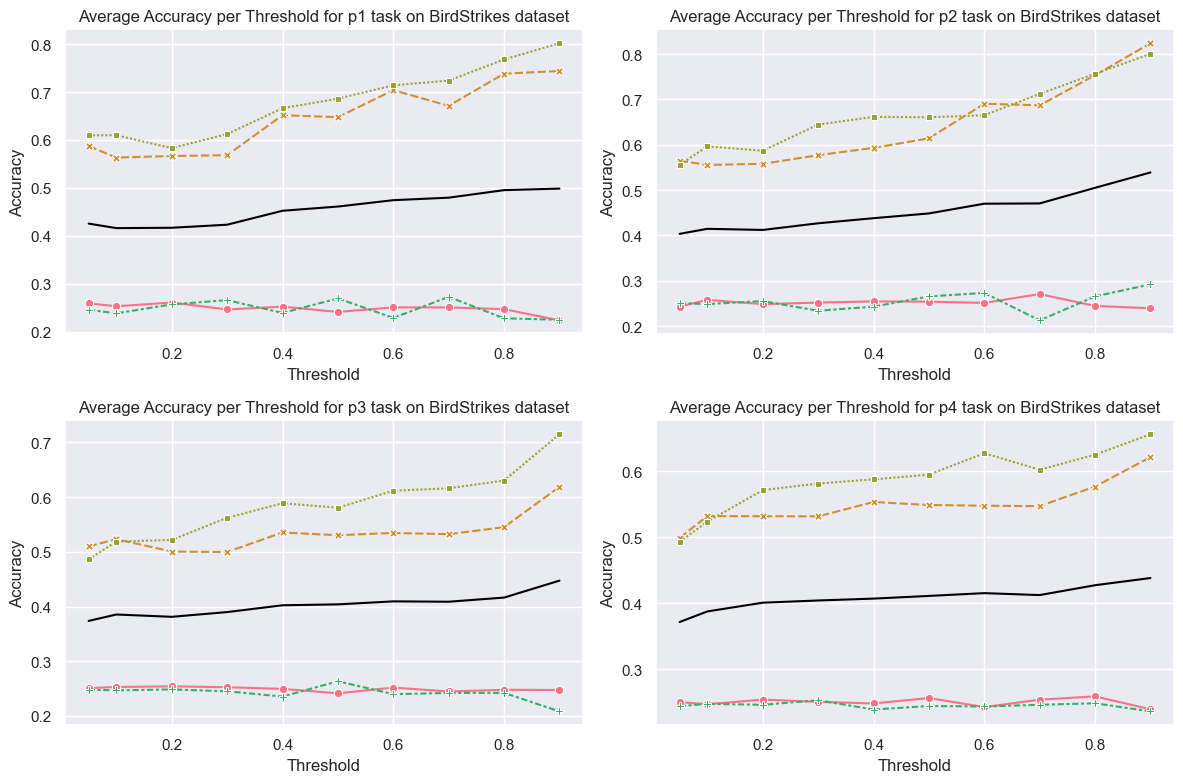

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the plotter function
def plotter(ax, df_all, task, dataset):
    # Define a color palette with the same colors for each algorithm
    palette = sns.color_palette('husl', n_colors=len(algorithms))

    # Group by 'Threshold' and 'Algorithm' and calculate the mean accuracy
    df_avg = df_all.groupby(['Threshold', 'Algorithm'])['Accuracy'].mean().reset_index()

    # Create the line plot with specified palette and markers
    sns.lineplot(x="Threshold", y="Accuracy", hue="Algorithm", data=df_avg, ax=ax,
                 palette=palette, markers=True, style="Algorithm")

    # Plot the overall average line
    df_avg_overall = df_avg.groupby(['Threshold'])['Accuracy'].mean().reset_index()
    ax.plot(df_avg_overall['Threshold'], df_avg_overall['Accuracy'], label='Overall Average', color='black')

    # Set title
    ax.set_title('Average Accuracy per Threshold for ' + task + ' task on ' + dataset + ' dataset')

    # Remove legend
    ax.legend().remove()

# Define the tasks, results path, and algorithms
tasks = ['p1', 'p2', 'p3', 'p4']
algorithms = sorted(['Random', 'Greedy', 'SARSA', 'QLearn', 'Reinforce', 'ActorCritic', 'Naive', 'WSLS'])

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Initialize an empty list to collect legend handles and labels
legend_handles = []
legend_labels = []

# Loop over each task
for i, task in enumerate(tasks):
    # Initialize an empty DataFrame to store results
    df_all = pd.DataFrame()

    # Loop over each algorithm
    for algo in algorithms:
        try:
            # Read the CSV file for the algorithm
            df = pd.read_csv(f'./{task}/{algo}.csv')
            df['Algorithm'] = algo
        except FileNotFoundError:
            print('No file for', algo)
            continue

        # Concatenate the current DataFrame with the DataFrame for all algorithms
        if algo == 'Random':
            df_all = df
        else:
            df_all = pd.concat([df_all, df])

    # Pass the current axes and data to the plotter function
    plotter(axes[i], df_all, task, 'BirdStrikes')

    # # Get legend handles and labels for the last chart
    # if task == tasks[-1]:
    #     handles, labels = axes[i].get_legend_handles_labels()
    #     legend_handles.extend(handles)
    #     legend_labels.extend(labels)

# Adjust layout
plt.tight_layout()

# # Add legend horizontally at the bottom for all algorithms
# fig.legend(legend_handles, legend_labels, bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=len(algorithms))

# Show the plot
plt.show()
